# Дз 3. Тестирование статистических гипотез

<div class="alert alert-info" role="alert">

Важно!

* Плагиат карается обнулением работы
* При использовании чужого кода из открытых источников необходимо указать ссылку на источник
* В каждой задаче необходимо обосновывать выбор статистического критерия, формулировать нулевую и альтернативную гипотезу и делать интерпретацию получившихся результатов, а также содержательный вывод.
* Весь текст оформляется строго в ячейках типа markdown

## Задача 1. Осьминог Пауль (2 балла)


В период с 2008 по 2010 год в Германии жил Осьминог Пауль, который был известен тем, что мог предсказывать результаты матчей с участием сборной Германии.     
   
В таблице ниже вы можете видеть результаты его предсказаний: 


<a href="https://ibb.co/VWnc5yG"><img src="https://i.ibb.co/QFS3tBV/image.jpg" alt="image" border="0"></a>

Если считать, что случайным образом мы угадывали ли бы 50% матчей, то можно ли утверждать, что осьминог Пауль был талантливым экстрасенсом со способностями к предсказаниям?

In [1]:
# просто выбирая наугад мы фиксируем 11 исходов из 13. Уже видно, что вероятность маленькая)
print('{:0.5f}'.format(1. / 2 ** 11))

0.00049


In [2]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ сотворите статистическую магию
# Нулевая гипотеза: Пауль выбирает случайно
# Можно проверить по Бернулли
# 0.5 вероятность на угад
import math

matches = 13
right = 11
k = (math.factorial(matches) / (math.factorial(right) - math.factorial(matches - right)))
b = k * 0.5 ** right * 0.5 ** (matches - right)
print('{:0.5f}'.format(b))

0.01904


In [3]:
# если брать за вероятность ошибки первого рода 0,05, то 0.01904 < 0.05 -> критерий отвергается, то есть нельзя утверждать
# что Пауль экстрасенс, но как минимум он отгадывает лучше, чем просто случайно  

## Задача 2.  Корм и котики (2 балла)

    
Новый корм для котиков рекламируется с помощью рекламного баннера. Отдел маркетинга разработал для рекламы новый баннер. Они считают, что он более красивый. Перед фирмой возникла необходимость проверить какой из двух баннеров лучше.

Для этого была создана специальная веб-форма. В этой веб-форме людям по очереди демонстрировали оба баннера и просили поставить лайк, если баннер нравится человеку. Если человеку нравятся оба баннера, он может поставить два лайка. Если ему не нравится ни один баннер, он может не ставить лайки вовсе. Собранные в конечном итоге данные находятся в табличке.

Можно ли утверждать, что оба баннера одинаково хороши? Сформулируйте статистическую гипотезу для проверки того, что оба баннера выбирают одинаково часто. Проверьте ее и сделайте выводы.


In [4]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ сотворите статистическую магию
import pandas as pd 

df = pd.read_csv('banner_click_stat.csv', header = None, sep = '\t')
df.columns = ['b_a', 'b_b']
df.head()

,b_a,b_b
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0


In [5]:
# Вся информация о df
df.describe()

,b_a,b_b
count,1000.000000,1000.000000
mean,0.037000,0.053000
std,0.188856,0.224146
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [6]:
df.value_counts()

b_a  b_b
0    0      940
1    1       30
0    1       23
1    0        7
dtype: int64

array([[<AxesSubplot:title={'center':'b_a'}>,
        <AxesSubplot:title={'center':'b_b'}>]], dtype=object)

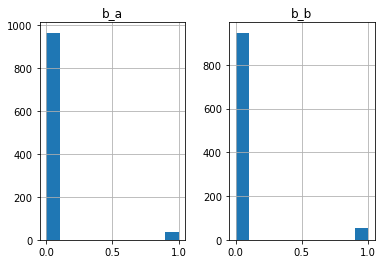

In [7]:
df.hist()

In [8]:
# Видно, что у b больше скор, но эта статистика, однозначно утверждать нельзя
# Так как есть пересечение(оценивают сразу 2 банера), то нужно использовать интервальную оценку долей
# Нулевая гипотеза: Оба банера выбирают одинакого часто

In [9]:
# https://akshay-a.medium.com/confidence-interval-for-population-proportion-basic-understanding-in-python-56b8cc5f8320
from statsmodels.stats.proportion import proportion_confint

b_a = proportion_confint(sum(df.b_a), df.shape[0], alpha=0.05, method = 'wilson')
b_b = proportion_confint(sum(df.b_b), df.shape[0], alpha=0.05, method = 'wilson')

print(f'95% доверительный интервал 1: {b_a}')
print(f'95% доверительный интервал 2: {b_b}')

95% доверительный интервал 1: (0.026961180875554734, 0.05058239748206931)
95% доверительный интервал 2: (0.04074650524859452, 0.06867461683749176)


In [10]:
# Заметим, что интервалы частично пересекаются, поэтому однозначных выводов сделать нельзя и нужно сравнивать их

In [11]:
# хоть на лекциях это было, но доп материалы прикольные еще есть
# https://kpfu.ru/portal/docs/F634359606/Lekciya.2.pdf
# https://mse.msu.ru/wp-content/uploads/2020/03/Лекция-7-Две-выборки-дополнительный-материал.pdf

In [12]:
# Независимая выборка: доли одинаковые, пользователям без разницы

In [13]:
l1 = float(sum(b_a)) / len(b_a)
l2 = float(sum(b_b)) / len(b_b)
l1, l2

(0.03877178917881202, 0.05471056104304314)

In [16]:
from scipy import stats
import scipy as sp
import numpy as np

b_a = df.b_a
b_b = df.b_b
z_s = sp.stats.norm.ppf(1 - 0.05 / 2)
delta = np.sqrt(l1 * (1 - l1) / len(b_a) + l2 * (1 - l2) / len(b_b))
l_interval = l1 - l2 - z_s * delta
r_interval = l1 - l2 + z_s * delta

In [17]:
print("Доверительный интревал:")
print(l_interval, r_interval)

Доверительный интревал:
-0.03442756550505434 0.0025500217765920923


In [18]:
lenght = len(b_a)
prob = lenght * float(l1 + l2) / (2 * lenght)
d = np.sqrt(prob * (1 - prob) * (1 / lenght + 1 / lenght))
z_statistics = (p1 - p2) / d
p_value = 2 * (1 - sp.stats.norm.cdf(np.abs(z_statistics)))
print("p-value:")
print(p_value)

NameError: name 'p1' is not defined

In [19]:
# так как 0.05 < p_value, то нулевую гипотезу принимаем и пользователям безразницы

In [20]:
# Зависимая выборка (взаимоисключающие оценки): доли одинаковые, пользователям без разницы

In [21]:
df.value_counts()

b_a  b_b
0    0      940
1    1       30
0    1       23
1    0        7
dtype: int64

In [22]:
# то есть в данном случае где 23 и 7

In [23]:
dm = list(zip(b_a, b_b))
d = z_s * np.sqrt(float((7 + 23)) / 1000**2 - float((7  - 23)**2) / 1000**3)
l_interval = (23 - 7) / lenght - d
r_interval = (23 - 7) / lenght + d
l_interval, r_interval

(0.00531073664078174, 0.02668926335921826)

In [24]:
z_statisctics_2 = float(7 - 23) / np.sqrt(7 + 23 - float((7 - 23)**2) / 1000 ) 

In [25]:
print('%.3f' % z_statisctics_2)

-2.934


In [26]:
p_value = 2 * (1 - sp.stats.norm.cdf(np.abs(z_statisctics_2)))
print('%.4f' % p_value)

0.0033


In [27]:
# А теперь видно, что p-value < 0.05 -> гипотеза отвергается, у пользователей есть фаворит, то есть второй баннер

## Задача 3. Немного АВ-тестов (3 балла)
## Игра Cookie Cat

В этом задании мы поработаем с данными Cookie Cats - популярной игры-головоломки, которую разработала компания Tactile Entertainment. В этой игре игрок должен соединять одинаковые элементы в ряд, чтобы очистить поле и выиграть уровень. 

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>
 
 
<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


По мере прохождения уровней перед игроками появляются ворота, открытия которых нужно ждать какое-то время или пропускать их, совершая покупки в приложении. С точки зрения создателей эти ворота повышают интерес к игре и стимулируют к вложению денег в игру.


Но у создателей появляется важный вопрос: **где лучше всего ставить ворота?**
Первоначально первые ворота были размещены на уровне 30. Однако есть гипотеза, что лучше переместить их на уровень 40. В этом задании вам предлагается проанализировать результаты AB-теста, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. 

**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - вернулся ли игрок в игру через 1 день после установки
* `retention_7` - вернулся ли игрок в игру через 7 дней после установки

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

In [28]:
import pandas as pd
df = pd.read_csv('cookie_cats.csv')
df.head(10)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
5,540,gate_40,187,True,True
6,1066,gate_30,0,False,False
7,1444,gate_40,2,False,False
8,1574,gate_40,108,True,True
9,1587,gate_40,153,True,False


In [29]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


In [30]:
df.value_counts()

userid   version  sum_gamerounds  retention_1  retention_7
116      gate_30  3               False        False          1
6632278  gate_40  4               False        False          1
6658202  gate_40  9               False        False          1
6658194  gate_40  1               False        False          1
6658134  gate_40  112             True         False          1
                                                             ..
3347358  gate_40  0               False        False          1
3347337  gate_40  3               False        False          1
3346992  gate_40  185             True         False          1
3346979  gate_30  38              True         True           1
9999861  gate_40  16              False        False          1
Length: 90189, dtype: int64

version
gate_30    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
gate_40    [[AxesSubplot(0.125,0.125;0.336957x0.755), Axe...
dtype: object

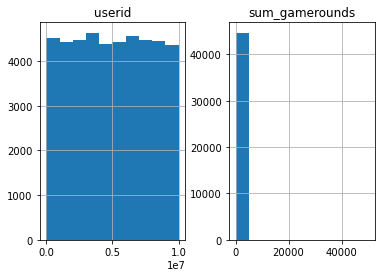

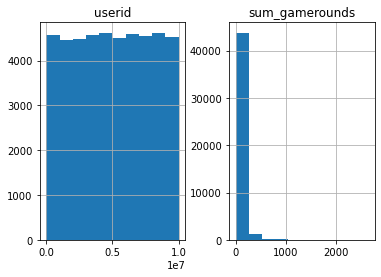

In [31]:
df.groupby('version').hist()

In [32]:
# на первый взгяд не сильные отличия, посмотрим цифры

In [33]:
df.groupby('version').mean()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,4.987564e+06,52.456264,0.448188,0.190201
gate_40,5.009073e+06,51.298776,0.442283,0.182000


In [34]:
# минимальные отличия все же есть

### Вопрос 1: есть ли зависимость между возвращаемостью игроков и расположением ворот?

In [35]:
sns.barplot(x=df.version, y=df.sum_gamerounds);

NameError: name 'sns' is not defined

In [36]:
df[['version','retention_1']].groupby('version').describe()

retention_1                     
              count unique    top   freq
version                                 
gate_30       44700      2  False  24666
gate_40       45489      2  False  25370

In [37]:
from scipy.stats import shapiro

A = df[df['version'] == 'gate_30']['sum_gamerounds']
B = df[df['version'] == 'gate_40']['sum_gamerounds']
# Проверим распределение

In [38]:
import scipy as sp

stat, p = sp.stats.shapiro(A) # тест Шапиро-Уилк 

alpha = 0.05

if p > alpha:
    print("Принять гипотезу о нормальности распределния A")
else:
    print("Отклонить гипотезу о нормальности распределния A")

stat, p = sp.stats.shapiro(B)

if p > alpha:
    print("Принять гипотезу о нормальности распределния B")
else:
    print("Отклонить гипотезу о нормальности распределния B")    


Отклонить гипотезу о нормальности распределния A
Отклонить гипотезу о нормальности распределния B


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [39]:
# следовательно подходит непараметрический тест
ttest = stats.mannwhitneyu(A, B)
print(ttest)

MannwhitneyuResult(statistic=1024331250.5, pvalue=0.05020880772044255)


In [40]:
# Между группами статистических различий нет! Зависимости между расположением ворот _почти_ нет.

#### 1.1 Проверьте гипотезу для возвращения через день

In [41]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ сотворите статистическую магию
# узнаем доли 
print(len(df[df['retention_1']==True])/len(df))

0.4452095044850259


In [42]:
df.groupby(by='version')['retention_1'].sum()/df.groupby(by='version')['retention_1'].count()

version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

In [43]:
# как видно чуть меньше половины возвращается после retention_1. А разница между воротами почти нет
# 44.8
# 44.2

In [44]:
# воспользуемся ttestом
# нулевая гипотеза: различий между расположением ворот нет
stats.ttest_ind(df[df.version=='gate_30'].retention_1,
                     df[df.version=='gate_40'].retention_1,  equal_var=False)

Ttest_indResult(statistic=1.7840774867039824, pvalue=0.07441443713953834)

In [45]:
import statsmodels.stats.proportion as sp

old = df[(df.version=='gate_30')&(df.retention_1==1)].shape[0]
new = df[(df.version=='gate_40')&(df.retention_1==1)].shape[0]
n_old = df[(df.version=='gate_30')].shape[0]
n_new = df[(df.version=='gate_40')].shape[0]
z_score, p_value = sp.proportions_ztest([old, new], [n_old, n_new], 
                                        alternative='larger')
print(z_score, p_value)

1.7840862247974725 0.03720482764845957


In [46]:
# Поскольку значение p=0,0372<0,05=α, можно сделать вывод, что вероятность возникновения H0 мала,
# отклонить H0 и принять H1. Таким образом, делается вывод, что gate_30 может улучшить коэффициент 
# удержания пользователей на второй день rb, чем gate_40.

#### 2.2 Проверьте гипотезу для возвращения через семь дней

In [47]:
df.groupby(by='version')['retention_7'].sum()/df.groupby(by='version')['retention_7'].count()

version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

In [48]:
sns.catplot(x="version", y="sum_gamerounds",hue="retention_1", col = 'retention_7', data=df)

NameError: name 'sns' is not defined

In [49]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ сотворите статистическую магию
import statsmodels.stats.proportion as sp

old = df[(df.version=='gate_30')&(df.retention_7==1)].shape[0]
new = df[(df.version=='gate_40')&(df.retention_7==1)].shape[0]
n_old = df[(df.version=='gate_30')].shape[0]
n_new = df[(df.version=='gate_40')].shape[0]
z_score, p_value = sp.proportions_ztest([old, new], [n_old, n_new])
print(z_score, p_value)

3.164358912748191 0.001554249975614329


In [52]:
#  0.00015 < 0.05 , Следовательно среднее посещение клиентов после 7 дней одинаковы в обеих версиях

### Вопрос 2: Отличается ли среднее количество раундов в группах gate_40 и gate_30?

In [53]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ сотворите статистическую магию
gate40 = df[df.version=='gate_40'].sum_gamerounds.mean()
gate30 = df[df.version=='gate_30'].sum_gamerounds.mean()
print(gate40, gate30, ((gate30-gate40)/gate30))

51.29877552814966 52.45626398210291 0.022065781397397313


In [57]:
# почти не отличается(немного)

In [58]:
stats.ttest_ind(np.array(df[df['version'] == 'gate_30']["sum_gamerounds"]), 
                      np.array(df[df['version'] == 'gate_40']["sum_gamerounds"]),
                equal_var=True, alternative='greater')

Ttest_indResult(statistic=0.8910426211362967, pvalue=0.18645434123702603)

In [59]:
# статистика тоже подвержает это

### Вопрос 3: Отличается ли медианное количество раундов в группах gate_40 и gate_30?

In [60]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ сотворите статистическую магию
g40 = df[df.version=='gate_40'].sum_gamerounds.median()
g30 = df[df.version=='gate_30'].sum_gamerounds.median()
print(g40, g30, g40-g30)

16.0 17.0 -1.0


In [ ]:
# по медиане различается 16 != 17

In [61]:
stats.ttest_ind(df[df.version == 'gate_30'].sum_gamerounds,
                df[df.version == 'gate_40'].sum_gamerounds)

Ttest_indResult(statistic=0.8910426211362967, pvalue=0.37290868247405207)

Полученное p = 0,37 >> 0,05 означает, что в целом нет существенной разницы в количестве игровых раундов, сыгранных игроком в течение первых 14 дней, как для группы g40, так и для группы g30.

## Задача 4: Время покемонов (3 балла)

В данной задаче вам будет необходимо проанализировать различные характеристики покемонов и сравнить их между собой

<p style="align: center;"><img align=center src="https://proprikol.ru/wp-content/uploads/2020/11/kartinki-pokemonov-2.jpg"  width=500></p>

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) и относятся к одному или двум так называемым классам (вода, огонь и т. д.). Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex.

### Описание данных

Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* pid: Numeric - ID покемона
* HP: Numeric - Очки здоровья
* Attack: Numeric - Сила обычной атаки
* Defense: Numeric - Сила обычной защиты
* Sp. Atk: Numeric - Сила специальной атаки
* Sp. Def: Numeric - Сила специальной защиты
* Speed: Numeric - Скорость движений
* Legendary: Boolean - «True», если покемон редкий
* Class 1: Categorical - Класс покемона
* Class 2: Categorical - Класс покемона

In [62]:
import pandas as pd
df = pd.read_csv('pokemon.csv')
df.head(10)

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,False


In [63]:
df.describe()

,pid,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [64]:
df.value_counts()

pid  Name                   Class 1   Class 2   HP   Attack  Defense  Sp. Atk  Sp. Def  Speed  Legendary
1    Bulbasaur              Grass     Poison    45   49      49       65       65       45     False        1
534  Wash Rotom             Electric  Water     50   65      107      105      107      86     False        1
554  Victini                Psychic   Fire      100  100     100      100      100      100    True         1
552  Shaymin Sky Forme      Grass     Flying    100  103     75       120      75       127    True         1
546  Giratina Origin Forme  Ghost     Dragon    150  120     100      120      100      90     True         1
                                                                                                           ..
279  Blaziken               Fire      Fighting  80   120     70       110      70       80     False        1
278  Combusken              Fire      Fighting  60   85      60       85       60       55     False        1
276  Mega Scept

In [65]:
df.isna().sum()

pid            0
Name           1
Class 1        0
Class 2      386
HP             0
Attack         0
Defense        0
Sp. Atk        0
Sp. Def        0
Speed          0
Legendary      0
dtype: int64

In [ ]:
# есть немного пропускиов 386 и 1

### Вопрос 1

Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически. 

In [68]:
### ╰( ͡° ͜ʖ ͡° )つ──☆ сотворите статистическую магию
df[df["Class 1"] == "Grass"].nunique(), df[df["Class 1"] == "Rock"].nunique()

(pid          70
 Name         70
 Class 1       1
 Class 2      10
 HP           25
 Attack       37
 Defense      30
 Sp. Atk      40
 Sp. Def      29
 Speed        38
 Legendary     2
 dtype: int64,
 pid          44
 Name         44
 Class 1       1
 Class 2      12
 HP           23
 Attack       31
 Defense      27
 Sp. Atk      28
 Sp. Def      26
 Speed        27
 Legendary     2
 dtype: int64)

In [69]:
df[df["Class 1"] == "Grass"].mean()

C:\Users\domon\AppData\Local\Temp/ipykernel_19996/3634205227.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df["Class 1"] == "Grass"].mean()


pid          381.414286
HP            67.271429
Attack        73.214286
Defense       70.800000
Sp. Atk       77.500000
Sp. Def       70.428571
Speed         61.928571
Legendary      0.042857
dtype: float64

In [70]:
df[df["Class 1"] == "Rock"].mean()

C:\Users\domon\AppData\Local\Temp/ipykernel_19996/1813790238.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df["Class 1"] == "Rock"].mean()


pid          432.840909
HP            65.363636
Attack        92.863636
Defense      100.795455
Sp. Atk       63.340909
Sp. Def       75.477273
Speed         55.909091
Legendary      0.090909
dtype: float64

In [75]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(df[(df['Class 1'] == 'Grass') | (df['Class 2'] == 'Grass')]['Attack'],
                       df[(df['Class 1'] == 'Rock') | (df['Class 2'] == 'Rock')]['Attack'])
print(stat, p)

1963.5 0.0029182095266317024


In [73]:
stats.ttest_ind(np.array(df[df["Class 1"] == "Grass"]["Attack"]), 
                      np.array(df[df["Class 1"] == "Rock"]["Attack"]),
                equal_var=False, alternative='less')

Ttest_indResult(statistic=-3.20601097459528, pvalue=0.001010328246934542)

In [ ]:
# Отконяем нулевую гипотезу -> Оук неправ и покемоны Grass имеют < атаку, чем покемоны класса Rock

### Вопрос 2

Также профессор Оук очень хочет проверить, правда ли нет значимой разницы между 
силой обычной атаки и силой обычной защиты у покемонов. Помогите ему и ответьте на вопрос, 
подтвердив свои выводы с помощью проверки статистических гипотез

In [76]:
df['Attack'].mean()

79.00125

In [77]:
df['Defense'].mean()

73.8425

In [80]:
stat, p = mannwhitneyu(df['Attack'],
                       df['Defense'])
print('Statistics=%.10f, p=%.10f' % (stat, p))

Statistics=353385.0000000000, p=0.0003004254


In [79]:
stats.ttest_ind(np.array(df["Attack"]), 
                      np.array(df["Defense"]),
                equal_var=False, alternative='greater')

Ttest_indResult(statistic=3.2417640740423126, pvalue=0.0006062187412272188)

In [ ]:
# Значит Оук неправ и средняя сила атаки выше, чем среднее значение защиты.

### Вопрос 3

И последний вопрос, который мучает профессора Оука: правда ли, что средняя скорость покемонов превышает 66.6 ? Сформулируйте подходящие гипотезы и помогите профессору Оуку, ответив на вопрос.

In [ ]:
# H0 средняя скорость покемонов будет превышать 66.6, 
# H1 если это не так.

In [82]:
stats.ttest_1samp(np.array(df["Speed"]), 
                      66.6, alternative='greater')

Ttest_1sampResult(statistic=1.6326941356636653, pvalue=0.051463667549085566)

In [81]:
df['Speed'].mean()

68.2775

In [85]:
stats.ttest_1samp(np.array(df["Speed"]), 
                      66.6, alternative='two-sided')

Ttest_1sampResult(statistic=1.6326941356636653, pvalue=0.10292733509817113)

In [86]:
# значение p value > 0.05 -> средняя не превышает, то есть скорее равна 66.6